# Grupos: A , I
integrantes: 
- Javier Vallejos 
- Frida Aduviri
- Licet Ancari

##### CIFAR-10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html
##### Consiste en 60000 imagenes de 32x32
##### Clasificacion de 10 clases: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck


In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Cargar y dividir el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar las imágenes al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Crear el modelo de red convolucional
model = models.Sequential([
    # Capa de convolución 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    # Capa de convolución 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Capa de convolución 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Capa completamente conectada (flatten)
    layers.Flatten(),
    
    # Capas completamente conectadas
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 clases de salida para CIFAR-10
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)         

In [10]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6122 - accuracy: 0.4113 - val_loss: 1.3535 - val_accuracy: 0.5212
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2877 - accuracy: 0.5408 - val_loss: 1.2654 - val_accuracy: 0.5431
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1535 - accuracy: 0.5938 - val_loss: 1.1126 - val_accuracy: 0.6115
Epoch 4/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0636 - accuracy: 0.6263 - val_loss: 1.0094 - val_accuracy: 0.6548
Epoch 5/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9968 - accuracy: 0.6484 - val_loss: 1.0992 - val_accuracy: 0.6196
Epoch 6/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9535 - accuracy: 0.6662 - val_loss: 0.9261 - val_accuracy: 0.6801
Epoch 7/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9217 - accuracy: 0.6780 - val_loss: 0.9107 -

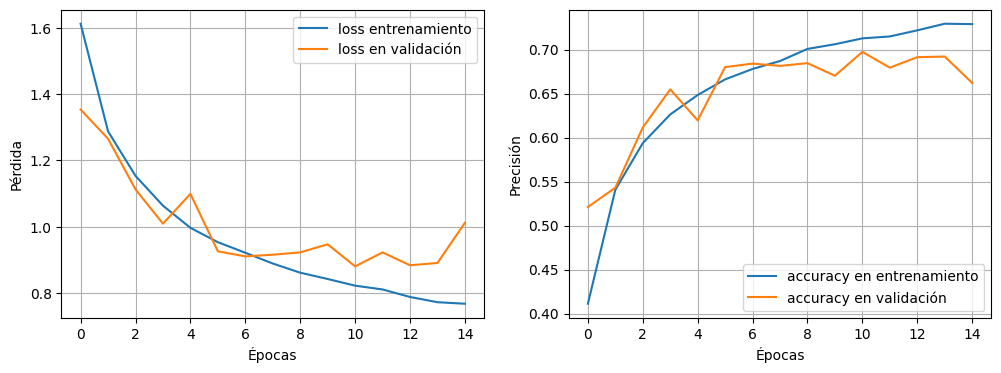

In [13]:
import matplotlib.pyplot as plt

# Graficar la pérdida (loss) en el conjunto de entrenamiento y en el conjunto de validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss entrenamiento')
plt.plot(history.history['val_loss'], label='loss en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid()
plt.legend()

# Graficar la precisión (accuracy) en el conjunto de entrenamiento y en el conjunto de validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy en entrenamiento')
plt.plot(history.history['val_accuracy'], label='accuracy en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

plt.show()

In [12]:
# Evaluar la precisión del modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nPrecisión en el conjunto de prueba:", test_acc)

313/313 - 2s - loss: 1.0121 - accuracy: 0.6621 - 2s/epoch - 6ms/step

Precisión en el conjunto de prueba: 0.6621000170707703
